In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

sns.set(style='darkgrid', font_scale=1.2)
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [52]:
data = pd.read_csv('./auto-mpg.csv',header=0)

In [54]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [56]:
data1 = pd.DataFrame(data.groupby('origin')['mpg'].mean())
data1

,mpg
origin,
1.0,20.083534
2.0,27.891429
3.0,30.450633


In [57]:
data1.iloc[0,0]

20.083534136546184

In [58]:
data.loc[data['origin']== 1.0, 'mpg'] = data.loc[data['origin']== 1.0, 'mpg'].fillna(data1.iloc[0,0])
data.loc[data['origin']== 2.0, 'mpg'] = data.loc[data['origin']== 2.0, 'mpg'].fillna(data1.iloc[1,0])
data.loc[data['origin']== 3.0, 'mpg'] = data.loc[data['origin']== 3.0, 'mpg'].fillna(data1.iloc[2,0])


In [110]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           406 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    406 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [112]:
data.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.772530,-0.800513,-0.765798,-0.829114,0.421484,0.570830,0.565873
cylinders,-0.772530,1.000000,0.951787,0.840140,0.895220,-0.522452,-0.360762,-0.567478
displacement,-0.800513,0.951787,1.000000,0.894719,0.932475,-0.557984,-0.381714,-0.613056
horsepower,-0.765798,0.840140,0.894719,1.000000,0.862617,-0.692274,-0.419758,-0.458538
weight,-0.829114,0.895220,0.932475,0.862617,1.000000,-0.430086,-0.315389,-0.584109
acceleration,0.421484,-0.522452,-0.557984,-0.692274,-0.430086,1.000000,0.301992,0.218845
model year,0.570830,-0.360762,-0.381714,-0.419758,-0.315389,0.301992,1.000000,0.187656
origin,0.565873,-0.567478,-0.613056,-0.458538,-0.584109,0.218845,0.187656,1.000000


<Axes: >

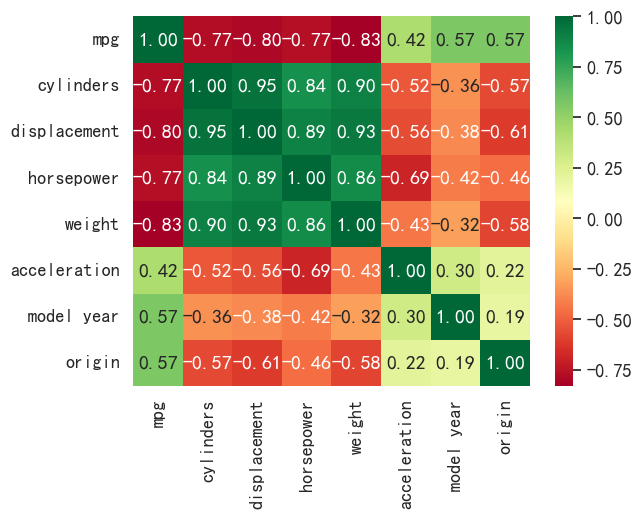

In [113]:
sns.heatmap(data.corr(numeric_only=True), cmap=plt.cm.RdYlGn, annot=True, fmt=".2f")

### 任务一

In [114]:
# 气缸数越高,引擎容量越大,燃料效率越低。
data['mpg'].corr(data['cylinders'])

-0.7725295753718893

In [115]:
# 排气量越大,引擎容量越大,燃料效率越低。
data['mpg'].corr(data['displacement'])

-0.8005129409546857

In [116]:
# 马力越高,引擎输出越大,燃料效率越低。
data['mpg'].corr(data['horsepower'])

-0.7657979259993452

In [117]:
# 重量越重,需要更多的能量来驱动,燃料效率越低。
data['mpg'].corr(data['weight'])

-0.8291138916579849

In [118]:
# 加速时间越短,引擎输出越大,燃料效率越低。
data['mpg'].corr(data['acceleration'])

0.42148439524418846

In [119]:
# 随着时间的推移,汽车技术不断提高,燃料效率也在提高。
data['mpg'].corr(data['model year'])

0.5708299223778174

In [120]:
# 美国和日本制造的车通常更注重燃料效率。
pd.DataFrame(data.groupby('origin')['mpg'].mean())


,mpg
origin,
1.0,20.083534
2.0,27.891429
3.0,30.450633


### 任务2

In [127]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [128]:
x = data.iloc[:,1:-4]
y = data.iloc[:,0]
print(x.shape, y.shape)

(406, 4) (406,)


In [129]:
# 切分数据集，使用线性回归实现拟合，并在测试集上预测。
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [130]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 253 to 172
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     324 non-null    float64
 1   displacement  324 non-null    float64
 2   horsepower    324 non-null    float64
 3   weight        324 non-null    float64
dtypes: float64(4)
memory usage: 12.7 KB


In [131]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.coef_,lr.intercept_)
print("训练集R^2：", lr.score(x_train, y_train))
print("测试集R^2：", lr.score(x_test, y_test))

[-0.40105938 -0.00166061 -0.04179912 -0.00500944] 45.118182725280434
训练集R^2： 0.7111217791560478
测试集R^2： 0.6549908395192879


In [132]:
# 并在测试集上预测
y_test_predict = lr.predict(x_test)
y_test_predict

array([26.59223157, 13.3828604 , 31.79736921, 14.45879096, 23.61427959,
       15.30484298, 30.37422901, 11.63782092, 29.27578167,  6.94761131,
       32.16684805, 24.83956196, 27.49601486, 28.85329303, 14.7235041 ,
       21.40528404, 29.35804538, 29.26077677, 30.54013886, 29.16685651,
       30.0842802 , 15.09125872, 19.85018988, 19.49121492, 22.01647424,
       20.97591226, 30.0859408 , 16.5526133 , 16.31922386, 20.62309892,
       19.17608507, 24.68868761, 24.46390889,  9.29437282, 28.19435665,
       12.31858891, 30.07732262, 29.43424173, 23.54915692, 21.67579358,
       27.65203533, 23.39386441, 22.33790162, 30.56334415, 10.14890075,
       15.93179287, 30.41420605, 18.18241861, 29.84659324, 27.27784658,
       11.51928722, 25.85901625, 23.905555  , 32.00025003, 12.32256322,
       13.88678605, 21.26570741, 29.80526293, 14.81910478, 22.84753696,
       23.0070283 , 26.30954193, 13.34692395, 28.07226146, 30.75524927,
       18.27878248, 19.86882693, 27.90627374, 26.28464902, 30.76

In [151]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
steps = [("poly", PolynomialFeatures(include_bias=False)), ("lr", LinearRegression())]
pipe = Pipeline(steps)
for i in range(1,8):
    pipe.set_params(poly__degree=i)
    pipe.fit(x_train, y_train)
    train_score = pipe.score(x_train, y_train)
    test_score = pipe.score(x_test, y_test)
    print(f'{i}次幂',train_score, test_score)
    # print(pipe.named_steps["lr"].coef_)

1次幂 0.7111217791560478 0.654990839519288
2次幂 0.770022218297581 0.6662707135851119
3次幂 0.8044302325051723 0.6462190342412757
4次幂 0.8389491395304152 0.6209239584898296
5次幂 0.8127449611822748 0.507542546752358
6次幂 0.8489689962355632 -0.09613900035106604
7次幂 0.8443956640500212 -3.5974512009474138


In [154]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
models = [
    ("线性回归（无正则化）", LinearRegression()), 
    ("L1正则化：", Lasso(alpha=0.02)),
    ("L2正则化", Ridge(alpha=0.02)), 
    ("弹性网络", ElasticNet(alpha=0.02,l1_ratio=0.5))
    ]
for i, (name, model) in enumerate(models):
    pipe = Pipeline([("poly", PolynomialFeatures(degree=15, include_bias=False)),("model", model)])
    # fit_and_plot(pipe)
    degrees = [1, 3, 8, 15]
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    
    # print(model.coef_)

In [155]:
train_score

0.711110152700481

In [156]:
test_score

0.6549441738527286